## 随机森林

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

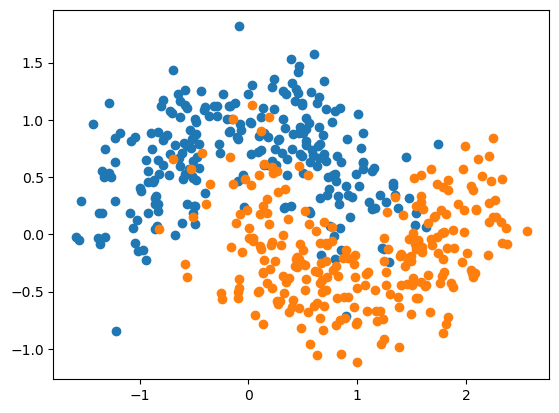

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 随机森林

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=666, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=666)

In [5]:
rf_clf.oob_score_

0.892

In [6]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True, random_state=666, n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.906

## 随机森林拥有决策树和BaggingClassifier的所有参数：）

### Extra-Trees

## 超随机，使用随机特征与随机阈值

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, 
                              bootstrap=True, 
                              oob_score=True, 
                              random_state=666, n_jobs=-1)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, n_estimators=500, n_jobs=-1,
                     oob_score=True, random_state=666)

In [8]:
et_clf.oob_score_

0.892

### 集成学习解决回归问题

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [11]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

## 随机森林-SVR处理回归问题

In [12]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
bag_reg = BaggingRegressor(SVR(),
                          n_estimators=500, max_samples=100,
                          bootstrap=True,
                          oob_score=True)
bag_reg.fit(X, y)

BaggingRegressor(base_estimator=SVR(), max_samples=100, n_estimators=500,
                 oob_score=True)

In [13]:
bag_reg.oob_score_

0.15878534789492038

In [14]:
y_predict = bag_reg.predict(X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predict)

70.66766386028311

## 随机森林-决策树处理回归问题

In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_reg2 = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500, max_samples=100,
                          bootstrap=True,
                          oob_score=True)
bag_reg2.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=100,
                 n_estimators=500, oob_score=True)

In [17]:
bag_reg2.oob_score_

0.8339141761080795

In [18]:
y_predict3 = bag_reg2.predict(X)
mean_squared_error(y, y_predict3)

9.468589522055348